In [1194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

# Ex.1
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [1195]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


# Binary logistic regression

In [1196]:
# Ex.1

# Dividing data
X = data.values[:, :2].T
y = data.values[:, 2:].T

# Creating theta vactor
theta = np.zeros((X.shape[0]+1, 1))

# Adding row of ones
X = np.concatenate([np.ones([1, X.shape[1]]), X])

# normalize features of X matrix
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))



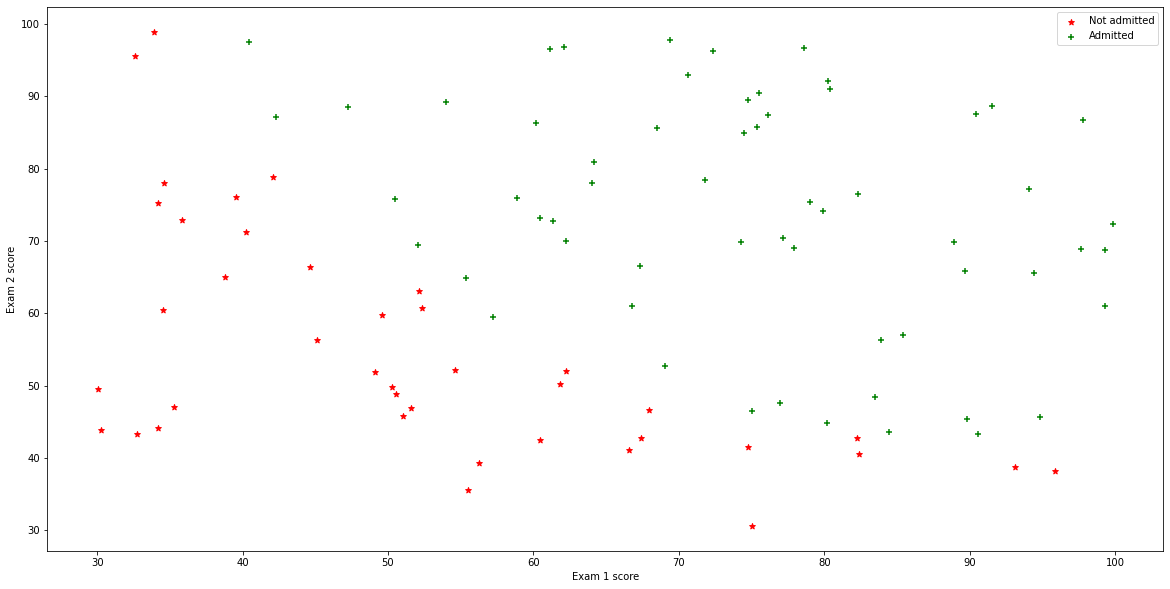

In [1197]:
# Ex.2 - plotting data
plt.figure(figsize=(20,10))
plt.scatter(data['Exam 1'][data['Admitted']==0], data['Exam 2'][data['Admitted']==0],c= 'r', marker='*', label='Not admitted')
plt.scatter(data['Exam 1'][data['Admitted']==1], data['Exam 2'][data['Admitted']==1],c= 'g', marker='+', label='Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()

In [1198]:
# Ex.3

def sig(t):
    return 1/(1 + np.exp(-t))


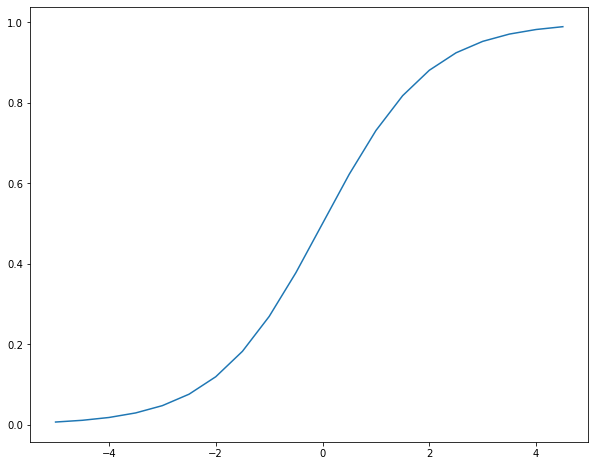

In [1199]:
# Ex.4

rang_dat = np.arange(-5,5,0.5)

plt.figure(figsize=(10,8))
plt.plot(rang_dat,(sig(rang_dat)))
plt.show()

In [1200]:
# Ex. 5 

def h(x,theta):
    return sig(theta.T@x)

def cost(theta, X, y):
    m = X.shape[1]
    J = (-y * np.log(h(X,theta))- (1-y)* np.log(1-h(X,theta))).sum() /m
    return J

theta = np.zeros((X.shape[0], 1))
print(f'Cost = {cost(theta, X, y)}')


Cost = 0.6931471805599453


In [1201]:
# Ex. 6

def simple_gradient(X, y, theta, alpha, it):
    cost_list = []
    for i in range(it):
        h = sig(theta.T @ X)
        h_y = h - y
        h_yxX = h_y @ X.T
        theta = theta - alpha * h_yxX.T / X.shape[1]

        cost_list += [cost(theta, X, y)]

    return theta, cost_list

alpha = 1
it = 150
theta, cost = simple_gradient(X, y, theta, alpha, it)

print(f'Cost: {cost[-1]}')
print(f'Theta: {theta}')

Cost: 0.20640714304449775
Theta: [[1.41957362]
 [3.35941597]
 [3.11271333]]


In [1202]:
# Ex. 7
thresh = 0.5
probability = h(X, theta)

d = data[["Admitted"]]
d.insert(loc=1, column='Prediction', value=(probability>thresh).astype(int).reshape((100,1)))
d


,Admitted,Prediction
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
95,1,1
96,1,1
97,1,1
98,1,0


In [1203]:
# All wrong predictions
new = d.where(d['Admitted'] != d['Prediction']).dropna()
new

,Admitted,Prediction
7,1.0,0.0
10,0.0,1.0
16,1.0,0.0
27,0.0,1.0
33,1.0,0.0
36,0.0,1.0
43,0.0,1.0
57,0.0,1.0
79,0.0,1.0
83,1.0,0.0


In [1204]:
accuracy = (len(d) - len(new))/len(d)
print(f'Accuracy: {accuracy}')

Accuracy: 0.89


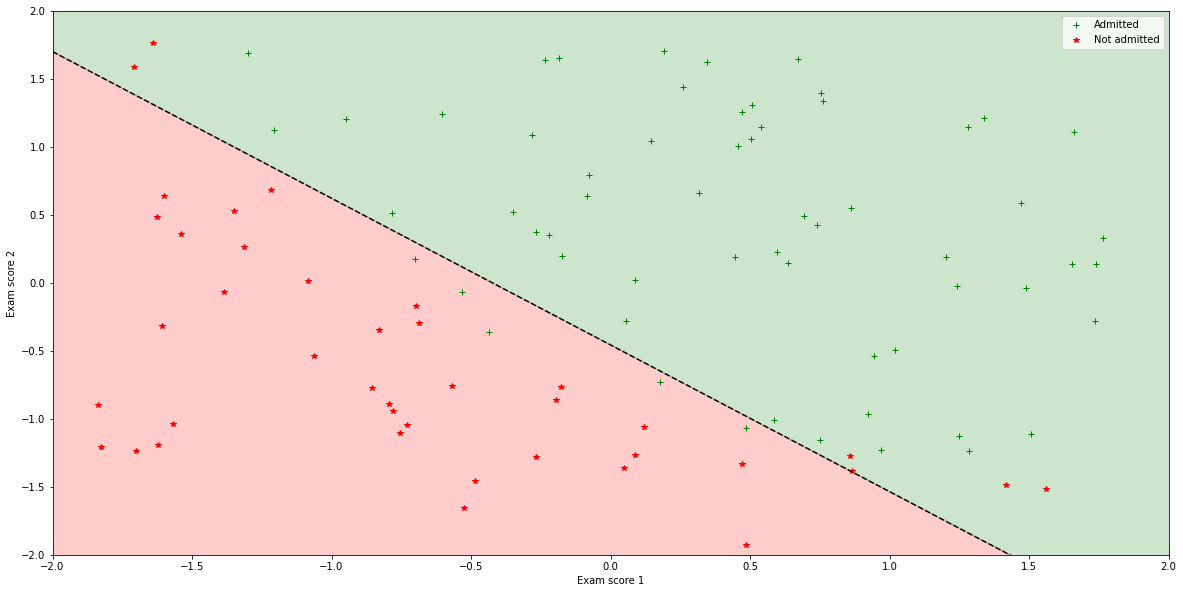

In [1205]:
# Ex. 8 
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.figure(figsize=(20,10))

X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, 'g+', label='Admitted')
plt.plot(X1_0, X2_0, 'r*', label='Not admitted')

x1 = np.arange(-4.0, 4.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.fill_between(x1, x2, np.min(x2), color='red', alpha=.2)
plt.fill_between(x1, x2, np.max(x2), color='green', alpha=.2)

x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.plot(x1, x2,'k--')

plt.legend(['Admitted', 'Not admitted'])
plt.xlabel('Exam score 1')
plt.ylabel('Exam score 2')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()

# Logistic regression - Python

In [1206]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

In [1207]:
# Ex. 1
logreg = LogisticRegression().fit(X, Y)

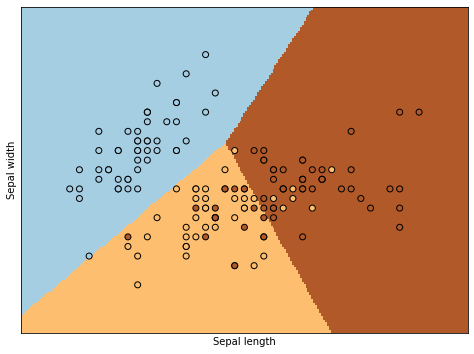

In [1208]:
# Ex.2
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

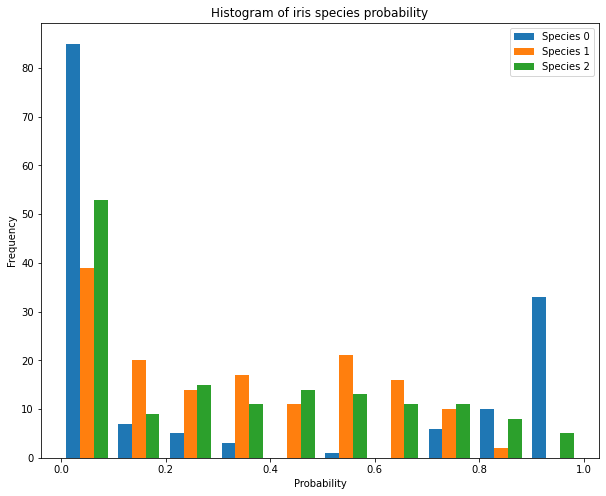

In [1209]:
# Probability estimates.
prob = logreg.predict_proba(X)
plt.figure(figsize=(10,8))
plt.hist(prob)
plt.title('Histogram of iris species probability')
plt.legend(['Species 0', 'Species 1', 'Species 2'])
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

In [1210]:
# Return the mean accuracy on the given test data and labels.
print(f'Mean accuracy: {logreg.score(X, Y)}')

Mean accuracy: 0.82


In [1211]:
# Get parameters for this estimator.
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [1212]:
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix,classification_report

# Accuracy classification score
print(f'Accuracy classification score: {accuracy_score(Y, logreg.predict(X))}')

Accuracy classification score: 0.82


In [1213]:
# Compute a confusion matrix for each class or sample.
# Our prediction is pretty precise, because True positive and True negatives 
# are much higher than False Positive and False Negative score
multilabel_confusion_matrix(Y, logreg.predict(X))

array([[[100,   0],
        [  0,  50]],

       [[ 86,  14],
        [ 13,  37]],

       [[ 87,  13],
        [ 14,  36]]], dtype=int64)

In [1214]:
# Build a text report showing the main classification metrics.
print(classification_report(Y, logreg.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.73      0.74      0.73        50
           2       0.73      0.72      0.73        50

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150

